Parse Log data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import itertools

# JSON API
import requests
import json

# data visualization
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def process_line(line: str):
    parts = line.split(' ')

    ip = parts[0]

    timestamp = parts[3] + parts[4]
    timestamp = timestamp.replace('[', '')
    timestamp = timestamp.replace(']', '')

    request_method = parts[5]
    request_method = request_method.replace('"', '')

    path = parts[6]
    protocol_version = parts[7]
    protocol_version = protocol_version.replace('"', '')
    status_code = parts[8]
    size = parts[9]
    unknown = parts[10]
    unknown = unknown.replace('"', '')
    user_agent = parts[11]
#    ' '.join(user_agent)
    user_agent = user_agent.replace('"', '')

    return dict(ip=ip, timestamp=timestamp,
                method=request_method,
                path=path,
                protocol=protocol_version,
                code=status_code,
                size=size,
                unknown=unknown,
                user_agent=user_agent)


In [3]:
# access_log = open('access.log','r')

In [4]:
with open('./access.log') as f:    
    contents = f.read()
   

In [5]:
lines = contents.split('\n')
processed_lines = []
for line in lines:
    if len(line) > 0:
        processed_lines.append(process_line(line))

In [6]:
df = pd.DataFrame(processed_lines)

In [7]:
df.head()

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,16/Apr/2019:19:34:42+0000,-,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,16/Apr/2019:19:34:42+0000,-,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,16/Apr/2019:19:34:44+0000,-,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,16/Apr/2019:19:34:46+0000,-,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,16/Apr/2019:19:34:48+0000,-,python-requests/2.21.0


In [8]:
df.timestamp = df['timestamp'].str.replace(':',' ',1)

In [9]:
df['datetime'] =  pd.to_datetime(df['timestamp'])

In [10]:
df.unknown.unique()

array(['-', 'https://python.zach.lol/api/V1/HiZach!',
       'https://python.zach.lol/api/v1/stores?page=0',
       'https://python.zach.lol/api/v1/stores?page=1',
       'https://python.zach.lol/api/v1/stores?page=2',
       'https://python.zach.lol/api/v1/stores?page=999',
       'https://python.zach.lol/api/v1/items?page=0',
       'http://localhost:8889/notebooks/timeseries_acquisition.ipynb',
       'https://python.zach.lol/api/v1//api/v1/items?page=2',
       'https://python.zach.lol/api/v1//api/v1/items',
       'https://python.zach.lol/api/v1//api/v1/items/next_page',
       'https://python.zach.lol/api/v1/helloclass!',
       'https://python.zach.lol/api/v1/I_DIDNT_DO_IT!!!!',
       'http://localhost:8888/notebooks/acquire.ipynb',
       'https://python.zach.lol/api/v1/sales?page=3',
       'https://ds.codeup.com/8.3_Acquire/', 'https://python.zach.lol/',
       'https://python.zach.lol/api/v1/items',
       'https://python.zach.lol/api/v1/'], dtype=object)

In [11]:
df.sample(20)

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent,datetime
9070,200,97.105.19.58,GET,/api/v1/sales?page=142,HTTP/1.1,510144,16/Apr/2019 21:41:39+0000,-,python-requests/2.21.0,2019-04-16 21:41:39
5518,200,97.105.19.58,GET,/api/v1/sales?page=123,HTTP/1.1,509846,16/Apr/2019 20:45:17+0000,-,python-requests/2.21.0,2019-04-16 20:45:17
3513,200,97.105.19.58,GET,/api/v1/sales?page=170,HTTP/1.1,509795,16/Apr/2019 20:13:02+0000,-,python-requests/2.21.0,2019-04-16 20:13:02
2613,200,97.105.19.58,GET,/api/v1/sales?page=75,HTTP/1.1,510134,16/Apr/2019 20:03:16+0000,-,python-requests/2.21.0,2019-04-16 20:03:16
11304,200,97.105.19.58,GET,/api/v1/sales?page=97,HTTP/1.1,509783,16/Apr/2019 22:36:12+0000,-,python-requests/2.21.0,2019-04-16 22:36:12
11598,200,97.105.19.58,GET,/api/v1/sales?page=20,HTTP/1.1,500257,16/Apr/2019 22:47:00+0000,-,python-requests/2.21.0,2019-04-16 22:47:00
5950,200,97.105.19.58,GET,/api/v1/sales?page=2,HTTP/1.1,494819,16/Apr/2019 20:49:22+0000,-,python-requests/2.21.0,2019-04-16 20:49:22
9011,200,97.105.19.58,GET,/api/v1/sales?page=164,HTTP/1.1,511628,16/Apr/2019 21:41:04+0000,-,python-requests/2.21.0,2019-04-16 21:41:04
6630,200,97.105.19.58,GET,/api/v1/sales?page=2,HTTP/1.1,494819,16/Apr/2019 20:56:45+0000,-,python-requests/2.21.0,2019-04-16 20:56:45
5960,200,97.105.19.58,GET,/api/v1/sales?page=91,HTTP/1.1,511883,16/Apr/2019 20:49:30+0000,-,python-requests/2.21.0,2019-04-16 20:49:30


In [12]:
df.ip.unique()

array(['97.105.19.58', '3.92.201.136', '52.90.165.200', '3.88.129.158',
       '34.207.64.242', '54.172.14.223', '34.229.70.250',
       '35.175.171.137', '54.145.52.184', '52.87.230.102', '35.174.209.2',
       '72.181.105.81', '70.121.214.34', '68.201.219.223',
       '173.173.113.51', '72.181.113.170', '52.91.30.150', '24.26.242.9',
       '45.23.250.16'], dtype=object)

In [13]:
df.groupby(['ip']).count()

,code,method,path,protocol,size,timestamp,unknown,user_agent,datetime
ip,,,,,,,,,
173.173.113.51,1059,1059,1059,1059,1059,1059,1059,1059,1059
24.26.242.9,21,21,21,21,21,21,21,21,21
3.88.129.158,1,1,1,1,1,1,1,1,1
3.92.201.136,1,1,1,1,1,1,1,1,1
34.207.64.242,1,1,1,1,1,1,1,1,1
34.229.70.250,1,1,1,1,1,1,1,1,1
35.174.209.2,1,1,1,1,1,1,1,1,1
35.175.171.137,2,2,2,2,2,2,2,2,2
45.23.250.16,1,1,1,1,1,1,1,1,1


In [14]:
df.set_index('datetime', inplace=True)

 return records in a specific time range

In [15]:
df['2019-04-16 19':'2019-04-16 21']


,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
datetime,,,,,,,,,
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,16/Apr/2019 19:34:42+0000,-,python-requests/2.21.0
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,16/Apr/2019 19:34:42+0000,-,python-requests/2.21.0
2019-04-16 19:34:44,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,16/Apr/2019 19:34:44+0000,-,python-requests/2.21.0
2019-04-16 19:34:46,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,16/Apr/2019 19:34:46+0000,-,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,16/Apr/2019 19:34:48+0000,-,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/stores,HTTP/1.1,1328,16/Apr/2019 19:34:48+0000,-,python-requests/2.21.0
2019-04-16 19:34:50,200,97.105.19.58,GET,/api/v1/sales?page=85,HTTP/1.1,510753,16/Apr/2019 19:34:50+0000,-,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/api/v1/sales?page=86,HTTP/1.1,510348,16/Apr/2019 19:34:52+0000,-,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/,HTTP/1.1,42,16/Apr/2019 19:34:52+0000,-,python-requests/2.21.0


In [16]:
df['size'] = df['size'].astype('int')
# size in gigabytes
df['size'].resample('5min').sum() /1024 /1024 /1024

datetime
2019-04-16 19:30:00    0.004758
2019-04-16 19:35:00    0.102058
2019-04-16 19:40:00    0.137764
2019-04-16 19:45:00    0.217636
2019-04-16 19:50:00    0.236906
2019-04-16 19:55:00    0.233417
2019-04-16 20:00:00    0.234168
2019-04-16 20:05:00    0.181388
2019-04-16 20:10:00    0.135481
2019-04-16 20:15:00    0.041950
2019-04-16 20:20:00    0.128257
2019-04-16 20:25:00    0.103319
2019-04-16 20:30:00    0.093708
2019-04-16 20:35:00    0.204684
2019-04-16 20:40:00    0.230039
2019-04-16 20:45:00    0.236071
2019-04-16 20:50:00    0.230686
2019-04-16 20:55:00    0.130561
2019-04-16 21:00:00    0.081114
2019-04-16 21:05:00    0.127240
2019-04-16 21:10:00    0.082078
2019-04-16 21:15:00    0.100464
2019-04-16 21:20:00    0.063010
2019-04-16 21:25:00    0.109330
2019-04-16 21:30:00    0.092714
2019-04-16 21:35:00    0.210964
2019-04-16 21:40:00    0.147285
2019-04-16 21:45:00    0.153800
2019-04-16 21:50:00    0.172576
2019-04-16 21:55:00    0.100070
                         ...   

In [17]:
df.index.min(), df.index.max()

(Timestamp('2019-04-16 19:34:42'), Timestamp('2019-04-17 12:55:14'))

In [18]:
df = df.tz_localize('utc').tz_convert('America/Chicago')

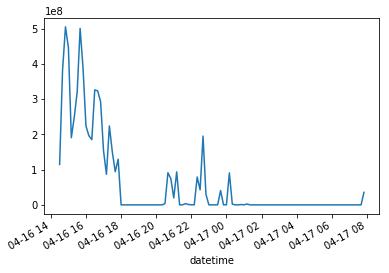

In [19]:
df['size'].resample('10min').sum().plot()
plt.show()

In [21]:
df.reset_index(inplace=True)

In [24]:
df.datetime.dt.hour

0        14
1        14
2        14
3        14
4        14
5        14
6        14
7        14
8        14
9        14
10       14
11       14
12       14
13       14
14       14
15       14
16       14
17       14
18       14
19       14
20       14
21       14
22       14
23       14
24       14
25       14
26       14
27       14
28       14
29       14
         ..
13944     7
13945     7
13946     7
13947     7
13948     7
13949     7
13950     7
13951     7
13952     7
13953     7
13954     7
13955     7
13956     7
13957     7
13958     7
13959     7
13960     7
13961     7
13962     7
13963     7
13964     7
13965     7
13966     7
13967     7
13968     7
13969     7
13970     7
13971     7
13972     7
13973     7
Name: datetime, Length: 13974, dtype: int64

In [6]:
# example convert to datetime
def parse_sales_date(df):
    datetime_format = '%a, %d %b %Y %H:%M:%S %Z'
    df.sale_date = pd.to_datetime(df.sale_date, format=datetime_format)
    return df

In [ ]:
# example localize
def set_date_index(df,convert_utc):
#  must set date as index before performing tz_localize
    df.set_index('sale_date', inplace=True)
    df = df.tz_localize('utc').tz_convert('America/Chicago')
    return df

In [ ]:
# examples on how to break out date components
dates = pd.Series(df.index)
df['year'] = df.sale_date.dt.year
df['quarter'] = df.sale_date.dt.quarter
df['month'] = df.sale_date.dt.month
df['day'] = df.sale_date.dt.day
df['weekday'] = df.sale_date.dt.day_name().str[:3]
df['is_weekend'] = df.weekday.str.startswith('Sat') | df.weekday.str.startswith('Sun')

In [ ]:
def improve_sales_data(df):
    df['sale_total'] = df.sale_amount * df.item_price
    df.rename(columns={'sale_ampount:' quantity'}, inplace=True)
    return df

In [ ]:
df.groupby('weekday')[['sale_total','quantity']].agg(['median','sum'])

In [ ]:
# .diff auto calculates the difference from the previous row
df['diff_from_last_day'] = df.sale_total.diff()

example using date ranges


In [ ]:
# generates range of dates given frequency and number of samples
date_index = pd.date_range(start='2019-04-18 13:30:00', freq='30min', periods=10)
df = pd.DataFrame 